In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3, outputSize = 1):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer

        self.W1 = np.random.rand(inputSize+1, hiddenlayer) 
        self.W2 = np.random.rand(hiddenlayer, outputSize)    
        
    def feedforward(self, X):
        self.z = np.dot(X, self.W1)
        self.activated_z = self.relu(self.z)
        self.z1 = np.dot(self.activated_z, self.W2)
        output = self.sigmoid(self.z1)
        return output
    
    def sigmoid(self, s):
        activated_output = 1 / (1 + (np.exp(-s)))
        return activated_output
 
    def sigmoid_derivative(self, s):
        der_sigmoid = s * (1 - s)
        return der_sigmoid 

    def tanh(self, s):
        positive = np.exp(+s)
        negative = np.exp(-s)
        out_array = (positive - negative)/(positive + negative)
        return out_array

    def tanh_derivative(self, s):
        derivate_tan = 1 - (s**2)
        return derivate_tan
    
    def relu(self, s):
        relu_activation =  np.maximum(0,s)
        return relu_activation

    def relu_derivative(self, s):
        #derivative of relu
        s[s<=0] = 0
        s[s>0] = 1
        return s

    def backwardpropagate(self,X, Y, y_pred, lr):  
        delta2 = y_pred - Y
        d_W2 = (np.dot(self.activated_z.T,delta2))
    
        delta1 = np.multiply(delta2.dot(self.W2.T),self.relu_derivative(self.activated_z))
        d_W1 = (np.dot(X.T, delta1))
        
        self.W1 = self.W1 - (lr*d_W1)
        self.W2 = self.W2 - (lr*d_W2)
    
    def crossentropy(self, Y, Y_pred):
        error_ce =  (-np.sum((Y * np.log2(Y_pred)) + ((1-Y) * np.log2(1- Y_pred))))/len(Y)
        return error_ce 

    def train(self, trainX, trainY, epochs, learningRate, validationX = 'Null', validationY = 'Null'):
        train_error = []
        valid_error = []
        train_accu = []
        valid_accu = []
        for i in range(epochs):
            
            pred = self.feedforward(trainX)
            self.backwardpropagate(trainX, trainY, pred, learningRate)
            train_error.append( self.crossentropy(trainY, pred))
            if validationX != 'Null' and validationY != 'Null':
                val_pred = self.predict(validationX)
                valid_error.append(self.crossentropy(validationY, val_pred))
                valid_accu.append(self.accuracy(validationX, validationY))
            train_accu.append(self.accuracy(trainX, trainY))
            
            print ("epoch:",i, "training Loss:" ,train_error[-1], "validation Loss:" ,valid_error[-1],\
                   " valid acc:", valid_accu[-1], " train Acc:", train_accu[-1])
                
        self.curve_plot(epochs, train_error, valid_error, train_accu, valid_accu)
        
    def curve_plot(self, epochs, train_error, valid_error, train_accu, valid_accu):
        
        plt.legend(loc='best')
        plt.title("loss curve")
        plt.plot(range(epochs), train_error)
        plt.plot(range(epochs), valid_error)
        plt.show()     
        plt.legend(loc='best')
        plt.title("accuracy Curve")
        plt.plot(range(epochs), train_accu)
        plt.plot(range(epochs), valid_accu)
        plt.show()

    def predict(self, testX):
        # predict the value of testX
        test_pred = self.feedforward(testX)
        return test_pred
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        test_pred = self.predict(testX)
        TP = 0
        TN = 0
        test_pred[test_pred>=0.5] = 1
        test_pred[test_pred<0.5] = 0
        x= np.mean(testY == test_pred)
        return x
    
    def saveModel(self,name):
        np.savez(name, self.W1, self.W2)

    def loadModel(self,name):
        self.file = np.load(name, allow_pickle = True)
        self.W1 = self.file['arr_0']
        self.W2 = self.file['arr_1']

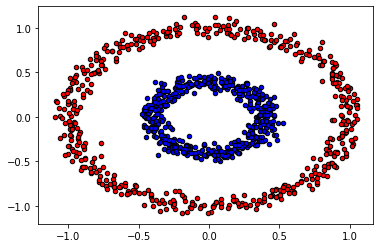

In [3]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [4]:
#Note: shuffle this dataset before dividing it into three parts
from sklearn.utils import shuffle
X, y = shuffle(data, label, random_state=0)
# Distribute this data into three parts i.e. training, validation and testing

trainX, validX, testX = X[:700], X[700:850], X[850:]
trainY, validY, testY = y[:700], y[700:850], y[850:]

trainY = np.expand_dims(trainY, axis=1)
testY = np.expand_dims(testY, axis=1)
validY = np.expand_dims(validY, axis=1)

In [5]:
m , n, o = len(trainX), len(validX), len(testX)
trainX = np.hstack((trainX, np.atleast_2d(np.ones(m)).T))
testX = np.hstack((testX, np.atleast_2d(np.ones(n)).T))
validX = np.hstack((validX, np.atleast_2d(np.ones(o)).T))

In [6]:
trainX.shape

(700, 3)

C:\Users\Mudasser Afzal\Anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


epoch: 0 training Loss: 1.1560757172013347 validation Loss: 1.2416498740334405  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 1 training Loss: 1.15055859126186 validation Loss: 1.2342882689570736  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 2 training Loss: 1.145314690605531 validation Loss: 1.2272450031929836  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 3 training Loss: 1.1403273379514864 validation Loss: 1.2205150617358118  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 4 training Loss: 1.1355750678710663 validation Loss: 1.2140833089679561  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 5 training Loss: 1.1310467607501382 validation Loss: 1.2079335020023432  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 6 training Loss: 1.1267397268499333 validation Loss: 1.202043719591081  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 7 training

epoch: 90 training Loss: 1.0118086204323988 validation Loss: 1.0331959390051868  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 91 training Loss: 1.0113655789179943 validation Loss: 1.0324863929390484  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 92 training Loss: 1.0109288350193923 validation Loss: 1.0317862406376708  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 93 training Loss: 1.0104985791130996 validation Loss: 1.031095842022739  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 94 training Loss: 1.0100755616890391 validation Loss: 1.0304157592024692  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 95 training Loss: 1.0096593216171437 validation Loss: 1.0297448393572415  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 96 training Loss: 1.0092487325844288 validation Loss: 1.0290821434231856  valid acc: 0.4533333333333333  train Acc: 0.5228571428571429
epoch: 

epoch: 186 training Loss: 0.9841494294829293 validation Loss: 0.9896397474526426  valid acc: 0.6266666666666667  train Acc: 0.6557142857142857
epoch: 187 training Loss: 0.9839303681974856 validation Loss: 0.989319682708123  valid acc: 0.6266666666666667  train Acc: 0.6614285714285715
epoch: 188 training Loss: 0.9837106816843408 validation Loss: 0.9890008360812628  valid acc: 0.6266666666666667  train Acc: 0.6642857142857143
epoch: 189 training Loss: 0.9834913021485227 validation Loss: 0.9886831780734767  valid acc: 0.6266666666666667  train Acc: 0.67
epoch: 190 training Loss: 0.9832721934643591 validation Loss: 0.9883671643388228  valid acc: 0.6266666666666667  train Acc: 0.67
epoch: 191 training Loss: 0.9830534145145576 validation Loss: 0.9880531208961559  valid acc: 0.6266666666666667  train Acc: 0.6714285714285714
epoch: 192 training Loss: 0.9828347942401693 validation Loss: 0.9877402169341565  valid acc: 0.6266666666666667  train Acc: 0.6714285714285714
epoch: 193 training Loss: 0.

epoch: 282 training Loss: 0.9637383630263932 validation Loss: 0.9627895263035949  valid acc: 0.62  train Acc: 0.6085714285714285
epoch: 283 training Loss: 0.9635264391840968 validation Loss: 0.9625322077995618  valid acc: 0.62  train Acc: 0.6085714285714285
epoch: 284 training Loss: 0.963314232028595 validation Loss: 0.9622751032835617  valid acc: 0.62  train Acc: 0.6057142857142858
epoch: 285 training Loss: 0.9631017366319181 validation Loss: 0.9620182038100381  valid acc: 0.62  train Acc: 0.6042857142857143
epoch: 286 training Loss: 0.9628889481503888 validation Loss: 0.9617615005303528  valid acc: 0.62  train Acc: 0.6028571428571429
epoch: 287 training Loss: 0.9626758618239127 validation Loss: 0.9615049846917926  valid acc: 0.62  train Acc: 0.6028571428571429
epoch: 288 training Loss: 0.9624624729752754 validation Loss: 0.9612486476365996  valid acc: 0.62  train Acc: 0.6028571428571429
epoch: 289 training Loss: 0.9622479507516081 validation Loss: 0.9609924656006565  valid acc: 0.62 

epoch: 374 training Loss: 0.9433601504429078 validation Loss: 0.9381051148239874  valid acc: 0.62  train Acc: 0.6142857142857143
epoch: 375 training Loss: 0.9431323522510905 validation Loss: 0.9378309862011823  valid acc: 0.62  train Acc: 0.6142857142857143
epoch: 376 training Loss: 0.9429049115825504 validation Loss: 0.9375563439266776  valid acc: 0.62  train Acc: 0.6142857142857143
epoch: 377 training Loss: 0.942679726225381 validation Loss: 0.9372816238570503  valid acc: 0.62  train Acc: 0.6157142857142858
epoch: 378 training Loss: 0.9424542373961449 validation Loss: 0.9370068198073587  valid acc: 0.62  train Acc: 0.6157142857142858
epoch: 379 training Loss: 0.9422284427885771 validation Loss: 0.9367319256502455  valid acc: 0.62  train Acc: 0.6157142857142858
epoch: 380 training Loss: 0.9420023401475656 validation Loss: 0.9364569353158244  valid acc: 0.62  train Acc: 0.6157142857142858
epoch: 381 training Loss: 0.9417759272686889 validation Loss: 0.9361818427915548  valid acc: 0.62 

epoch: 466 training Loss: 0.9213773038140691 validation Loss: 0.912127508232061  valid acc: 0.6333333333333333  train Acc: 0.6257142857142857
epoch: 467 training Loss: 0.9211275062694132 validation Loss: 0.9118402303291078  valid acc: 0.6333333333333333  train Acc: 0.6257142857142857
epoch: 468 training Loss: 0.9208773665332878 validation Loss: 0.9115528056069233  valid acc: 0.6333333333333333  train Acc: 0.6271428571428571
epoch: 469 training Loss: 0.9206268835139653 validation Loss: 0.9112652282860639  valid acc: 0.6333333333333333  train Acc: 0.6271428571428571
epoch: 470 training Loss: 0.9203760561575203 validation Loss: 0.9109774926583001  valid acc: 0.6333333333333333  train Acc: 0.6271428571428571
epoch: 471 training Loss: 0.9201248834471021 validation Loss: 0.9106895930862652  valid acc: 0.6333333333333333  train Acc: 0.6271428571428571
epoch: 472 training Loss: 0.9198733644022151 validation Loss: 0.9104015240031068  valid acc: 0.6333333333333333  train Acc: 0.6271428571428571


epoch: 559 training Loss: 0.896910714161644 validation Loss: 0.8847541478480044  valid acc: 0.6466666666666666  train Acc: 0.6457142857142857
epoch: 560 training Loss: 0.8966361540616817 validation Loss: 0.8844677802458402  valid acc: 0.6466666666666666  train Acc: 0.6457142857142857
epoch: 561 training Loss: 0.8963613012052382 validation Loss: 0.8841809750980989  valid acc: 0.6466666666666666  train Acc: 0.6457142857142857
epoch: 562 training Loss: 0.8960862580693868 validation Loss: 0.8838999006664858  valid acc: 0.6466666666666666  train Acc: 0.6457142857142857
epoch: 563 training Loss: 0.8958105770626923 validation Loss: 0.8836181163818594  valid acc: 0.6466666666666666  train Acc: 0.6457142857142857
epoch: 564 training Loss: 0.8955350113528825 validation Loss: 0.8833416454188034  valid acc: 0.6466666666666666  train Acc: 0.6457142857142857
epoch: 565 training Loss: 0.8952616432436721 validation Loss: 0.8830657742056948  valid acc: 0.6466666666666666  train Acc: 0.6471428571428571


epoch: 655 training Loss: 0.8709539282286093 validation Loss: 0.8588244367907686  valid acc: 0.6533333333333333  train Acc: 0.67
epoch: 656 training Loss: 0.8706910750233828 validation Loss: 0.8585669078273174  valid acc: 0.6533333333333333  train Acc: 0.67
epoch: 657 training Loss: 0.8704277653909217 validation Loss: 0.8583148348464729  valid acc: 0.6533333333333333  train Acc: 0.67
epoch: 658 training Loss: 0.8701634410269994 validation Loss: 0.8580625388701941  valid acc: 0.6533333333333333  train Acc: 0.67
epoch: 659 training Loss: 0.8698993185636055 validation Loss: 0.8578100258716138  valid acc: 0.6533333333333333  train Acc: 0.67
epoch: 660 training Loss: 0.869635177137641 validation Loss: 0.857557567372603  valid acc: 0.66  train Acc: 0.67
epoch: 661 training Loss: 0.8693711077392887 validation Loss: 0.8573021904658921  valid acc: 0.66  train Acc: 0.67
epoch: 662 training Loss: 0.8691079008339935 validation Loss: 0.857046721314022  valid acc: 0.66  train Acc: 0.67
epoch: 663 tr

epoch: 742 training Loss: 0.8488441455307584 validation Loss: 0.8371868632566861  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 743 training Loss: 0.848600896468522 validation Loss: 0.8369489248987599  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 744 training Loss: 0.8483578730295517 validation Loss: 0.8367110195392401  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 745 training Loss: 0.8481146877077548 validation Loss: 0.8364726522016296  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 746 training Loss: 0.8478705870459622 validation Loss: 0.8362343141349177  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 747 training Loss: 0.8476266866034179 validation Loss: 0.8359960040952741  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 748 training Loss: 0.8473830927288973 validation Loss: 0.8357597516989572  valid acc: 0.6666666666666666  train Acc: 0.67
epoch: 749 training Loss: 0.8471402725214762 validation Loss: 0.8355216970087292  valid acc: 0.666

epoch: 837 training Loss: 0.8264195726818007 validation Loss: 0.8159123740599459  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 838 training Loss: 0.8261898703278034 validation Loss: 0.8157119861440149  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 839 training Loss: 0.8259601010473638 validation Loss: 0.8155110355939554  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 840 training Loss: 0.8257298346019522 validation Loss: 0.8153096112038946  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 841 training Loss: 0.8254997259267809 validation Loss: 0.8151077295899201  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 842 training Loss: 0.8252692508265813 validation Loss: 0.8149040636868272  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 843 training Loss: 0.825037447701242 validation Loss: 0.8147000030417195  valid acc: 0.66  train Acc: 0.6728571428571428
epoch: 844 training Loss: 0.8248057664437654 validation Loss: 0.8144955608212364  valid acc: 0.66 

epoch: 931 training Loss: 0.8043125870425443 validation Loss: 0.7962831602805069  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857
epoch: 932 training Loss: 0.8040652636735116 validation Loss: 0.7960729562452642  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857
epoch: 933 training Loss: 0.8038158456559205 validation Loss: 0.7958653489513327  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857
epoch: 934 training Loss: 0.8035665340684758 validation Loss: 0.7956567263282461  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857
epoch: 935 training Loss: 0.8033164979461603 validation Loss: 0.7954448798323837  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857
epoch: 936 training Loss: 0.8030649586300832 validation Loss: 0.7952330086090789  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857
epoch: 937 training Loss: 0.8028136859888967 validation Loss: 0.7950202534367308  valid acc: 0.6666666666666666  train Acc: 0.6757142857142857

epoch: 1017 training Loss: 0.7803773947391167 validation Loss: 0.7751112311604055  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1018 training Loss: 0.7800323305307701 validation Loss: 0.7748187639804773  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1019 training Loss: 0.7796875936671763 validation Loss: 0.7745242865825084  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1020 training Loss: 0.779342745970425 validation Loss: 0.7742296892602519  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1021 training Loss: 0.7789980510135199 validation Loss: 0.7739342047660089  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1022 training Loss: 0.7786550791148815 validation Loss: 0.7736331421541924  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1023 training Loss: 0.778309844093989 validation Loss: 0.7733110390236497  valid acc: 0.6733333333333333  train Acc: 0.68
epoch: 1024 training Loss: 0.777961015857831 validation Loss: 0.7729879730334712  valid acc:

epoch: 1095 training Loss: 0.7507460574048014 validation Loss: 0.7466312742986821  valid acc: 0.6733333333333333  train Acc: 0.6857142857142857
epoch: 1096 training Loss: 0.7503126364346885 validation Loss: 0.7462097322393914  valid acc: 0.6733333333333333  train Acc: 0.6857142857142857
epoch: 1097 training Loss: 0.749878194009171 validation Loss: 0.7457865280681327  valid acc: 0.6733333333333333  train Acc: 0.6857142857142857
epoch: 1098 training Loss: 0.7494427272632186 validation Loss: 0.745361680936452  valid acc: 0.6733333333333333  train Acc: 0.6857142857142857
epoch: 1099 training Loss: 0.7490062334646216 validation Loss: 0.744935209101094  valid acc: 0.6733333333333333  train Acc: 0.6857142857142857
epoch: 1100 training Loss: 0.7485688455629811 validation Loss: 0.7445125679044222  valid acc: 0.6733333333333333  train Acc: 0.6857142857142857
epoch: 1101 training Loss: 0.7481309794905171 validation Loss: 0.7440881206195772  valid acc: 0.6733333333333333  train Acc: 0.685714285714

epoch: 1189 training Loss: 0.7005209064895691 validation Loss: 0.6996306462386872  valid acc: 0.7  train Acc: 0.7057142857142857
epoch: 1190 training Loss: 0.699896853714171 validation Loss: 0.6990241513573561  valid acc: 0.7  train Acc: 0.7071428571428572
epoch: 1191 training Loss: 0.6992617458317674 validation Loss: 0.6983986007525333  valid acc: 0.7  train Acc: 0.7071428571428572
epoch: 1192 training Loss: 0.6986128499478333 validation Loss: 0.6977658817713955  valid acc: 0.7  train Acc: 0.7085714285714285
epoch: 1193 training Loss: 0.6979563126177386 validation Loss: 0.6971353456350236  valid acc: 0.7  train Acc: 0.7114285714285714
epoch: 1194 training Loss: 0.6972996824540486 validation Loss: 0.6965003706019435  valid acc: 0.7  train Acc: 0.7128571428571429
epoch: 1195 training Loss: 0.6966440922636665 validation Loss: 0.6958719065973114  valid acc: 0.7  train Acc: 0.7142857142857143
epoch: 1196 training Loss: 0.6959884743891424 validation Loss: 0.695239062202866  valid acc: 0.7  

epoch: 1271 training Loss: 0.644134543408231 validation Loss: 0.6456265173516982  valid acc: 0.78  train Acc: 0.7828571428571428
epoch: 1272 training Loss: 0.643396308194391 validation Loss: 0.644847421661913  valid acc: 0.78  train Acc: 0.7857142857142857
epoch: 1273 training Loss: 0.6426536743958526 validation Loss: 0.6440388610983371  valid acc: 0.78  train Acc: 0.7857142857142857
epoch: 1274 training Loss: 0.6418997694847849 validation Loss: 0.6432264520047655  valid acc: 0.78  train Acc: 0.7857142857142857
epoch: 1275 training Loss: 0.6411378760783099 validation Loss: 0.642411813113506  valid acc: 0.78  train Acc: 0.7871428571428571
epoch: 1276 training Loss: 0.6403777817723599 validation Loss: 0.6415996732950638  valid acc: 0.7933333333333333  train Acc: 0.7885714285714286
epoch: 1277 training Loss: 0.6396204070532892 validation Loss: 0.640790953331256  valid acc: 0.7933333333333333  train Acc: 0.7885714285714286
epoch: 1278 training Loss: 0.6388633321225508 validation Loss: 0.63

epoch: 1361 training Loss: 0.5749681483025401 validation Loss: 0.576332394758141  valid acc: 0.8266666666666667  train Acc: 0.8185714285714286
epoch: 1362 training Loss: 0.5742022652110135 validation Loss: 0.5755848034400576  valid acc: 0.8266666666666667  train Acc: 0.8185714285714286
epoch: 1363 training Loss: 0.5734318073442065 validation Loss: 0.5748241650233816  valid acc: 0.8266666666666667  train Acc: 0.82
epoch: 1364 training Loss: 0.5726523266284912 validation Loss: 0.5740598266108211  valid acc: 0.8266666666666667  train Acc: 0.82
epoch: 1365 training Loss: 0.5718675258633099 validation Loss: 0.5732978259923747  valid acc: 0.8266666666666667  train Acc: 0.82
epoch: 1366 training Loss: 0.5710842644273227 validation Loss: 0.5725359733923333  valid acc: 0.8266666666666667  train Acc: 0.82
epoch: 1367 training Loss: 0.570303822682973 validation Loss: 0.5717765613492704  valid acc: 0.8266666666666667  train Acc: 0.82
epoch: 1368 training Loss: 0.5695246955062766 validation Loss: 0

epoch: 1450 training Loss: 0.5089413655540854 validation Loss: 0.5098176552428608  valid acc: 0.84  train Acc: 0.8371428571428572
epoch: 1451 training Loss: 0.5082396984230921 validation Loss: 0.509093596211833  valid acc: 0.84  train Acc: 0.8371428571428572
epoch: 1452 training Loss: 0.5075397504191146 validation Loss: 0.5083730837408847  valid acc: 0.84  train Acc: 0.8371428571428572
epoch: 1453 training Loss: 0.5068415017494616 validation Loss: 0.5076559649903599  valid acc: 0.84  train Acc: 0.8371428571428572
epoch: 1454 training Loss: 0.5061449345247667 validation Loss: 0.5069421000894522  valid acc: 0.84  train Acc: 0.8371428571428572
epoch: 1455 training Loss: 0.5054500324615158 validation Loss: 0.5062313609247695  valid acc: 0.84  train Acc: 0.8371428571428572
epoch: 1456 training Loss: 0.5047567806322715 validation Loss: 0.5055236300501139  valid acc: 0.84  train Acc: 0.8385714285714285
epoch: 1457 training Loss: 0.5040651652559623 validation Loss: 0.5048187997041746  valid ac

epoch: 1526 training Loss: 0.45859143598971885 validation Loss: 0.458730427664252  valid acc: 0.8466666666666667  train Acc: 0.8457142857142858
epoch: 1527 training Loss: 0.4579430260785244 validation Loss: 0.4580799553072696  valid acc: 0.8466666666666667  train Acc: 0.8457142857142858
epoch: 1528 training Loss: 0.45729670300245745 validation Loss: 0.45743671844941125  valid acc: 0.8466666666666667  train Acc: 0.8457142857142858
epoch: 1529 training Loss: 0.4566526246522544 validation Loss: 0.45679924625211094  valid acc: 0.8466666666666667  train Acc: 0.8457142857142858
epoch: 1530 training Loss: 0.45601192961172776 validation Loss: 0.45616486517539284  valid acc: 0.8466666666666667  train Acc: 0.8457142857142858
epoch: 1531 training Loss: 0.45537322635002553 validation Loss: 0.45553348106800245  valid acc: 0.8466666666666667  train Acc: 0.8457142857142858
epoch: 1532 training Loss: 0.45473649762347934 validation Loss: 0.45490500723462823  valid acc: 0.8466666666666667  train Acc: 0.

epoch: 1615 training Loss: 0.40783085332195435 validation Loss: 0.40979426773427224  valid acc: 0.8666666666666667  train Acc: 0.8542857142857143
epoch: 1616 training Loss: 0.4073218291409827 validation Loss: 0.40931391440312587  valid acc: 0.8666666666666667  train Acc: 0.8542857142857143
epoch: 1617 training Loss: 0.40681421939721313 validation Loss: 0.4088352543653816  valid acc: 0.8666666666666667  train Acc: 0.8542857142857143
epoch: 1618 training Loss: 0.40630801445794745 validation Loss: 0.4083582557757617  valid acc: 0.8666666666666667  train Acc: 0.8542857142857143
epoch: 1619 training Loss: 0.405803676477893 validation Loss: 0.40788526585263224  valid acc: 0.8666666666666667  train Acc: 0.8542857142857143
epoch: 1620 training Loss: 0.4053017075599473 validation Loss: 0.407413688612318  valid acc: 0.8666666666666667  train Acc: 0.8542857142857143
epoch: 1621 training Loss: 0.40480109541262216 validation Loss: 0.4069435156722238  valid acc: 0.8666666666666667  train Acc: 0.8542

epoch: 1702 training Loss: 0.36802091719929797 validation Loss: 0.3710638888762979  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1703 training Loss: 0.3676078934867889 validation Loss: 0.37066304590106675  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1704 training Loss: 0.3671959074544106 validation Loss: 0.37026331572755855  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1705 training Loss: 0.36678495302834807 validation Loss: 0.36986469714987286  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1706 training Loss: 0.36637502421872414 validation Loss: 0.3694671882403275  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1707 training Loss: 0.36596611511597116 validation Loss: 0.369070786439707  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1708 training Loss: 0.36555829907052617 validation Loss: 0.3686764996021831  valid acc: 0.8733333333333333  train Acc: 0.86
epoch: 1709 training Loss: 0.365151556915797 validation Loss: 0.36828314023989084  

epoch: 1788 training Loss: 0.3364072379607204 validation Loss: 0.3410519381257717  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1789 training Loss: 0.33608200765882273 validation Loss: 0.34074844181478936  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1790 training Loss: 0.3357575879569339 validation Loss: 0.3404448718838423  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1791 training Loss: 0.33543397113773143 validation Loss: 0.3401412952217017  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1792 training Loss: 0.33511114997990377 validation Loss: 0.3398377716146433  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1793 training Loss: 0.33478911767880254 validation Loss: 0.3395343544895161  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1794 training Loss: 0.3344678677826225 validation Loss: 0.3392310915815798  valid acc: 0.88  train Acc: 0.8642857142857143
epoch: 1795 training Loss: 0.33414739414093025 validation Loss: 0.3389280255340502  v

epoch: 1873 training Loss: 0.3114579983305208 validation Loss: 0.316663971017203  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1874 training Loss: 0.31119456590779215 validation Loss: 0.3163943277808988  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1875 training Loss: 0.3109317784183145 validation Loss: 0.31612668273200045  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1876 training Loss: 0.31066971505264285 validation Loss: 0.3158643162350286  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1877 training Loss: 0.310408349677324 validation Loss: 0.3156054823420319  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1878 training Loss: 0.31014782642078664 validation Loss: 0.3153467558920867  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1879 training Loss: 0.3098878500299824 validation Loss: 0.3150888645507449  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1880 training Loss: 0.3096284170158437 validation Loss: 0.3148310997803777  valid

epoch: 1960 training Loss: 0.2907754681846775 validation Loss: 0.29614166541070336  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1961 training Loss: 0.2905610973078167 validation Loss: 0.2959328565066079  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1962 training Loss: 0.2903471927901137 validation Loss: 0.29572367527036375  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1963 training Loss: 0.2901337495981647 validation Loss: 0.2955141943921905  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1964 training Loss: 0.2899207631049711 validation Loss: 0.29530447885997946  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1965 training Loss: 0.2897082290221481 validation Loss: 0.2950945867736584  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1966 training Loss: 0.28949614334551493 validation Loss: 0.2948845700757185  valid acc: 0.88  train Acc: 0.8671428571428571
epoch: 1967 training Loss: 0.2892845023113207 validation Loss: 0.2946744752059263  val

epoch: 2055 training Loss: 0.27216889966830243 validation Loss: 0.27748703677334324  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2056 training Loss: 0.27198925551177267 validation Loss: 0.2773096299959274  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2057 training Loss: 0.2718099119307195 validation Loss: 0.27713253303905044  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2058 training Loss: 0.27163086807117526 validation Loss: 0.27695574553808483  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2059 training Loss: 0.2714527618272322 validation Loss: 0.27679182161804  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2060 training Loss: 0.2712769669572296 validation Loss: 0.2766271292896234  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2061 training Loss: 0.2711015141214794 validation Loss: 0.27646177230565433  valid acc: 0.88  train Acc: 0.8685714285714285
epoch: 2062 training Loss: 0.27092639847061595 validation Loss: 0.27629584376766786  

epoch: 2146 training Loss: 0.25743137138214883 validation Loss: 0.26311495962263703  valid acc: 0.88  train Acc: 0.87
epoch: 2147 training Loss: 0.2572842093215884 validation Loss: 0.26296723939872907  valid acc: 0.88  train Acc: 0.87
epoch: 2148 training Loss: 0.2571373024773447 validation Loss: 0.2628195589442017  valid acc: 0.88  train Acc: 0.87
epoch: 2149 training Loss: 0.25699064957576256 validation Loss: 0.2626719330821319  valid acc: 0.88  train Acc: 0.87
epoch: 2150 training Loss: 0.2568440730109478 validation Loss: 0.26251630529432957  valid acc: 0.88  train Acc: 0.87
epoch: 2151 training Loss: 0.25669662943537913 validation Loss: 0.2623614635634678  valid acc: 0.88  train Acc: 0.87
epoch: 2152 training Loss: 0.25654944793392703 validation Loss: 0.2622073456430591  valid acc: 0.88  train Acc: 0.87
epoch: 2153 training Loss: 0.25640252621471027 validation Loss: 0.2620538960022022  valid acc: 0.88  train Acc: 0.87
epoch: 2154 training Loss: 0.25625586219793756 validation Loss: 

epoch: 2235 training Loss: 0.24512529546227807 validation Loss: 0.2506685920845204  valid acc: 0.88  train Acc: 0.87
epoch: 2236 training Loss: 0.2449978985341801 validation Loss: 0.2505462182114843  valid acc: 0.88  train Acc: 0.87
epoch: 2237 training Loss: 0.24487070500911956 validation Loss: 0.250423370571336  valid acc: 0.88  train Acc: 0.87
epoch: 2238 training Loss: 0.2447437897034133 validation Loss: 0.25030010825392274  valid acc: 0.88  train Acc: 0.87
epoch: 2239 training Loss: 0.24461714868712842 validation Loss: 0.2501764844803609  valid acc: 0.88  train Acc: 0.87
epoch: 2240 training Loss: 0.24449077830449945 validation Loss: 0.25005254719192965  valid acc: 0.88  train Acc: 0.87
epoch: 2241 training Loss: 0.24436469429377367 validation Loss: 0.24991243703409008  valid acc: 0.88  train Acc: 0.87
epoch: 2242 training Loss: 0.2442388735110941 validation Loss: 0.24978919306517014  valid acc: 0.88  train Acc: 0.87
epoch: 2243 training Loss: 0.24411325878492623 validation Loss: 

epoch: 2320 training Loss: 0.2351827324665912 validation Loss: 0.2408123172285462  valid acc: 0.88  train Acc: 0.87
epoch: 2321 training Loss: 0.2350759512480664 validation Loss: 0.24070643841658948  valid acc: 0.88  train Acc: 0.87
epoch: 2322 training Loss: 0.2349693929594601 validation Loss: 0.24060024050932394  valid acc: 0.88  train Acc: 0.87
epoch: 2323 training Loss: 0.23486308477016224 validation Loss: 0.24048001433791152  valid acc: 0.88  train Acc: 0.87
epoch: 2324 training Loss: 0.2347570019833086 validation Loss: 0.24037446721782904  valid acc: 0.88  train Acc: 0.87
epoch: 2325 training Loss: 0.23465106253720616 validation Loss: 0.24026860546542644  valid acc: 0.88  train Acc: 0.87
epoch: 2326 training Loss: 0.234545338458587 validation Loss: 0.24016247028779983  valid acc: 0.88  train Acc: 0.87
epoch: 2327 training Loss: 0.2344398274231548 validation Loss: 0.2400560989700035  valid acc: 0.88  train Acc: 0.87
epoch: 2328 training Loss: 0.23433452724387585 validation Loss: 0

epoch: 2415 training Loss: 0.2256656807734453 validation Loss: 0.23069252969370657  valid acc: 0.88  train Acc: 0.87
epoch: 2416 training Loss: 0.22557185283216574 validation Loss: 0.23059068724529416  valid acc: 0.88  train Acc: 0.87
epoch: 2417 training Loss: 0.22547818862693564 validation Loss: 0.23048932906370387  valid acc: 0.88  train Acc: 0.87
epoch: 2418 training Loss: 0.2253846871109993 validation Loss: 0.2303893324740189  valid acc: 0.88  train Acc: 0.87
epoch: 2419 training Loss: 0.22529134730745792 validation Loss: 0.2302897791258954  valid acc: 0.88  train Acc: 0.87
epoch: 2420 training Loss: 0.22519816829794492 validation Loss: 0.23019061663843918  valid acc: 0.88  train Acc: 0.87
epoch: 2421 training Loss: 0.22510514921336774 validation Loss: 0.23009182148871649  valid acc: 0.88  train Acc: 0.87
epoch: 2422 training Loss: 0.22501228922632946 validation Loss: 0.2299933724268967  valid acc: 0.88  train Acc: 0.87
epoch: 2423 training Loss: 0.22491958754491634 validation Los

epoch: 2503 training Loss: 0.2178452817252757 validation Loss: 0.22264734814398734  valid acc: 0.8866666666666667  train Acc: 0.8714285714285714
epoch: 2504 training Loss: 0.21776072206113006 validation Loss: 0.22256208733480634  valid acc: 0.8866666666666667  train Acc: 0.8714285714285714
epoch: 2505 training Loss: 0.21767633676293022 validation Loss: 0.22247709139201025  valid acc: 0.8866666666666667  train Acc: 0.8714285714285714
epoch: 2506 training Loss: 0.21759212409958098 validation Loss: 0.22239049122272836  valid acc: 0.8866666666666667  train Acc: 0.8714285714285714
epoch: 2507 training Loss: 0.21750808243429873 validation Loss: 0.2223022250687031  valid acc: 0.8866666666666667  train Acc: 0.8714285714285714
epoch: 2508 training Loss: 0.21742421021509495 validation Loss: 0.22221417962894507  valid acc: 0.8866666666666667  train Acc: 0.8714285714285714
epoch: 2509 training Loss: 0.2173405059665282 validation Loss: 0.22212636723629933  valid acc: 0.8933333333333333  train Acc: 

epoch: 2594 training Loss: 0.21075529038309176 validation Loss: 0.21520801828502015  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2595 training Loss: 0.21068378223000483 validation Loss: 0.21512718344847323  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2596 training Loss: 0.21061256194191597 validation Loss: 0.21506249325643031  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2597 training Loss: 0.21054122603448985 validation Loss: 0.2149969702979898  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2598 training Loss: 0.2104700965840455 validation Loss: 0.21491493632421585  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2599 training Loss: 0.2103992918743958 validation Loss: 0.21484922286984906  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2600 training Loss: 0.2103283662748615 validation Loss: 0.21478279025699484  valid acc: 0.8933333333333333  train Acc: 0

epoch: 2688 training Loss: 0.2045594564997962 validation Loss: 0.2084689976458775  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2689 training Loss: 0.20449851255644774 validation Loss: 0.2083993326278111  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2690 training Loss: 0.20443765768087213 validation Loss: 0.20832974423054354  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2691 training Loss: 0.20437689158590838 validation Loss: 0.2082602328735158  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2692 training Loss: 0.20431621398650426 validation Loss: 0.2081907989369725  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2693 training Loss: 0.20425562459967458 validation Loss: 0.2081214427650393  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2694 training Loss: 0.20419512314446128 validation Loss: 0.20805216466853443  valid acc: 0.8933333333333333  train Acc: 0.8

epoch: 2775 training Loss: 0.19956421983825415 validation Loss: 0.20229764657777105  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2776 training Loss: 0.19951013838667198 validation Loss: 0.20223019024023586  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2777 training Loss: 0.19945612620030975 validation Loss: 0.20216282305092464  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2778 training Loss: 0.19940218310434293 validation Loss: 0.2020955454372842  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2779 training Loss: 0.19934834054661296 validation Loss: 0.20202982734416722  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2780 training Loss: 0.1992946573918406 validation Loss: 0.20196410194178152  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2781 training Loss: 0.1992410422416968 validation Loss: 0.2018983778849596  valid acc: 0.8933333333333333  train Acc: 0

epoch: 2864 training Loss: 0.19500386016402266 validation Loss: 0.19662198714286808  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2865 training Loss: 0.19495376439896428 validation Loss: 0.1965560274769467  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2866 training Loss: 0.1949037366040275 validation Loss: 0.19649068483948404  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2867 training Loss: 0.19485377582412378 validation Loss: 0.19642591352292488  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2868 training Loss: 0.19480388122599476 validation Loss: 0.19636167190714923  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2869 training Loss: 0.19475405207842617 validation Loss: 0.19629792208138422  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2870 training Loss: 0.19470428773579743 validation Loss: 0.19623462950233658  valid acc: 0.8933333333333333  train Acc:

epoch: 2957 training Loss: 0.1905997040784041 validation Loss: 0.19140556539705836  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2958 training Loss: 0.19055576225593768 validation Loss: 0.1913479993915287  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2959 training Loss: 0.1905116558876256 validation Loss: 0.19130279462342595  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2960 training Loss: 0.19046760266310717 validation Loss: 0.1912568672320945  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2961 training Loss: 0.19042363170231702 validation Loss: 0.19121028347719787  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2962 training Loss: 0.19037974063687946 validation Loss: 0.19116310405120268  valid acc: 0.8933333333333333  train Acc: 0.8742857142857143
epoch: 2963 training Loss: 0.19033607649082407 validation Loss: 0.19110342864829866  valid acc: 0.8933333333333333  train Acc: 0

epoch: 3049 training Loss: 0.186643061614933 validation Loss: 0.18625117889429882  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3050 training Loss: 0.18660081528591255 validation Loss: 0.1861942766309191  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3051 training Loss: 0.18655864164483968 validation Loss: 0.18613751437118406  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3052 training Loss: 0.1865165693223973 validation Loss: 0.18608141594914485  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3053 training Loss: 0.18647459711262238 validation Loss: 0.18602540887166  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3054 training Loss: 0.1864326952504897 validation Loss: 0.18596948902986707  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3055 training Loss: 0.18639086302065586 validation Loss: 0.18591365278440847  valid acc: 0.9  train Acc: 0.8742857142857143
epoch: 3056 training Loss: 0.18634909974046385 validation Loss: 0.1858578969215309  valid a

epoch: 3142 training Loss: 0.18297841865956327 validation Loss: 0.18133335755697028  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3143 training Loss: 0.1829415527567374 validation Loss: 0.18128420183672497  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3144 training Loss: 0.1829047333532008 validation Loss: 0.1812351040044509  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3145 training Loss: 0.18286796032218505 validation Loss: 0.18118606540977367  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3146 training Loss: 0.18283123353776826 validation Loss: 0.1811370872805961  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3147 training Loss: 0.1827945528748413 validation Loss: 0.1810881707330959  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3148 training Loss: 0.18275791820907863 validation Loss: 0.18103931678089297  valid acc: 0.9066666666666666  train Acc: 0.8

epoch: 3233 training Loss: 0.1797211899863302 validation Loss: 0.17694576358969713  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3234 training Loss: 0.1796864283319683 validation Loss: 0.17690117621219612  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3235 training Loss: 0.17965170938715716 validation Loss: 0.17685668492402334  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3236 training Loss: 0.1796170330253597 validation Loss: 0.17681228781056998  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3237 training Loss: 0.17958239912152024 validation Loss: 0.17676798308314323  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3238 training Loss: 0.17954780755199828 validation Loss: 0.17672376906909087  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3239 training Loss: 0.1795132581945073 validation Loss: 0.1766796442027355  valid acc: 0.9066666666666666  train Acc: 0.

epoch: 3326 training Loss: 0.17667534345974198 validation Loss: 0.17317395708693337  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3327 training Loss: 0.17664460653226524 validation Loss: 0.173126196672736  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3328 training Loss: 0.17661419799737466 validation Loss: 0.17309180682757339  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3329 training Loss: 0.17658348280590067 validation Loss: 0.17305701792361536  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3330 training Loss: 0.1765528192308912 validation Loss: 0.1730218643418009  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3331 training Loss: 0.1765224965907269 validation Loss: 0.17297372599191946  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3332 training Loss: 0.17649200202296847 validation Loss: 0.1729390304723592  valid acc: 0.9066666666666666  train Acc: 0.8

epoch: 3421 training Loss: 0.17392704282900553 validation Loss: 0.16964180520820177  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3422 training Loss: 0.17389976025574397 validation Loss: 0.16960602496586333  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3423 training Loss: 0.1738725089270377 validation Loss: 0.1695702806586445  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3424 training Loss: 0.1738452887490793 validation Loss: 0.1695345961703671  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3425 training Loss: 0.1738180996291768 validation Loss: 0.16949902571718078  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3426 training Loss: 0.17379094147571778 validation Loss: 0.16946349242836584  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3427 training Loss: 0.17376381419813505 validation Loss: 0.1694279967515929  valid acc: 0.9066666666666666  train Acc: 0.8

epoch: 3500 training Loss: 0.17186449642174292 validation Loss: 0.1669623551583233  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3501 training Loss: 0.17183951867991165 validation Loss: 0.16693015620138324  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3502 training Loss: 0.17181456634125572 validation Loss: 0.16689798605325332  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3503 training Loss: 0.17178963935259012 validation Loss: 0.16686584538639734  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3504 training Loss: 0.17176473766099434 validation Loss: 0.16683373481800817  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3505 training Loss: 0.17173986121380416 validation Loss: 0.16680165491422042  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3506 training Loss: 0.17171500995860398 validation Loss: 0.16676960619399925  valid acc: 0.9066666666666666  train Acc

epoch: 3594 training Loss: 0.16943968522909758 validation Loss: 0.16370858794020343  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3595 training Loss: 0.16941485884202181 validation Loss: 0.1636753837577631  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3596 training Loss: 0.16939006457317546 validation Loss: 0.16364219598438864  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3597 training Loss: 0.16936530225510146 validation Loss: 0.16360902521172424  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3598 training Loss: 0.16934057172473405 validation Loss: 0.1635758720317971  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3599 training Loss: 0.16931587282319915 validation Loss: 0.1635427370355661  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3600 training Loss: 0.1692912053956256 validation Loss: 0.16350962081161863  valid acc: 0.9066666666666666  train Acc: 0

epoch: 3683 training Loss: 0.1673432808715594 validation Loss: 0.16086824394295646  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3684 training Loss: 0.16732090787759343 validation Loss: 0.16083794465687745  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3685 training Loss: 0.16729855906789384 validation Loss: 0.16080768430668566  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3686 training Loss: 0.16727623438475703 validation Loss: 0.1607774628880304  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3687 training Loss: 0.16725393377077072 validation Loss: 0.16074728039413397  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3688 training Loss: 0.16723165716881008 validation Loss: 0.16071713681586838  valid acc: 0.9066666666666666  train Acc: 0.8742857142857143
epoch: 3689 training Loss: 0.1672094045220339 validation Loss: 0.16068703214182942  valid acc: 0.9066666666666666  train Acc: 

epoch: 3775 training Loss: 0.16510312287696174 validation Loss: 0.15811882462814666  valid acc: 0.9066666666666666  train Acc: 0.8771428571428571
epoch: 3776 training Loss: 0.16507349372486113 validation Loss: 0.15808509788620081  valid acc: 0.9066666666666666  train Acc: 0.8771428571428571
epoch: 3777 training Loss: 0.1650440090543798 validation Loss: 0.15805234457495612  valid acc: 0.9066666666666666  train Acc: 0.8771428571428571
epoch: 3778 training Loss: 0.1650146616092005 validation Loss: 0.15802048208817168  valid acc: 0.9066666666666666  train Acc: 0.8771428571428571
epoch: 3779 training Loss: 0.16498544489901215 validation Loss: 0.1579894346404429  valid acc: 0.9066666666666666  train Acc: 0.8771428571428571
epoch: 3780 training Loss: 0.16495635310090412 validation Loss: 0.15795913269634032  valid acc: 0.9066666666666666  train Acc: 0.8771428571428571
epoch: 3781 training Loss: 0.16492738097441295 validation Loss: 0.15792951245059692  valid acc: 0.9066666666666666  train Acc: 

epoch: 3868 training Loss: 0.16268856435394838 validation Loss: 0.1557090418240568  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3869 training Loss: 0.16266635052878956 validation Loss: 0.15568111780654756  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3870 training Loss: 0.162644186580906 validation Loss: 0.15565354972970902  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3871 training Loss: 0.1626220711861439 validation Loss: 0.1556263096600857  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3872 training Loss: 0.1626000031286224 validation Loss: 0.1555993718927394  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3873 training Loss: 0.16257798128791393 validation Loss: 0.15557271277561044  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3874 training Loss: 0.1625560046279613 validation Loss: 0.15554631054805793  valid acc: 0.9066666666666666  train Acc: 0.88
epoch: 3875 training Loss: 0.16253407218748517 validation Loss: 0.15552014519236804 

epoch: 3936 training Loss: 0.16094260857169604 validation Loss: 0.1541543063478152  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3937 training Loss: 0.16091203300599932 validation Loss: 0.15413630981587711  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3938 training Loss: 0.16088161523420305 validation Loss: 0.154118517985587  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3939 training Loss: 0.16085135055303826 validation Loss: 0.15410090184016176  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3940 training Loss: 0.1608212345520341 validation Loss: 0.1540834350267586  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3941 training Loss: 0.16079126308669495 validation Loss: 0.15406609363912077  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3942 training Loss: 0.16076143225481787 validation Loss: 0.1540488560179214  valid acc: 0.9066666666666666  train Acc: 0.8

No handles with labels found to put in legend.


epoch: 3970 training Loss: 0.1600031371628174 validation Loss: 0.15346481998916925  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3971 training Loss: 0.15997827963936134 validation Loss: 0.15344457604085743  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3972 training Loss: 0.15995351999856536 validation Loss: 0.15342445248786676  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3973 training Loss: 0.15992885580201943 validation Loss: 0.15340443283289312  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3974 training Loss: 0.15990428473563298 validation Loss: 0.1533845020929895  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3975 training Loss: 0.1598798045996967 validation Loss: 0.15336464667723537  valid acc: 0.9066666666666666  train Acc: 0.8828571428571429
epoch: 3976 training Loss: 0.15985541330005065 validation Loss: 0.15334485427410485  valid acc: 0.9066666666666666  train Acc: 

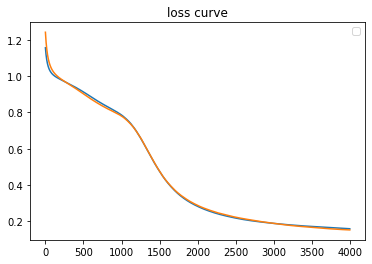

No handles with labels found to put in legend.


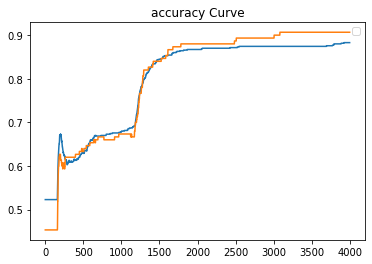

In [10]:
model = Neural_Network(2,3,1)
model.train(trainX, trainY, epochs =4000, learningRate = 0.0001, validationX = validX, validationY = validY)

In [11]:
#save the best model which you have trained, 
model.saveModel('task2bestmodel')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [12]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('task2bestmodel.npz')
# check accuracy of that model
mm.accuracy(testX,testY)

###  tanh----  train and validation accuracy = 100, 98
###  relu----  train and validation accuracy = 88.8
###  sigmoid----  train and validation accuracy = 100



0.8866666666666667